In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Augment the data

In [ ]:
train = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255)

Loading and augmentation of given data

In [ ]:
A_train = train.flow_from_directory('/content/drive/MyDrive/Dataset/train', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')
A_test = test.flow_from_directory('/content/drive/MyDrive/Dataset/test', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
print(A_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [ ]:
print(A_test.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


Import Keras library

In [ ]:
model = Sequential()

Add 1st Convolution Layer and Pooling  layer

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add 2nd Convolution Layer and Pooling layer

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add Flatten layer

In [ ]:
model.add(Flatten())

Add dense layers

In [ ]:
model.add(Dense(units=512,activation='relu'))

In [ ]:
model.add(Dense(units=6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

Compile the model

In [ ]:
model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam')

Train the model

In [ ]:
model.fit(A_train,steps_per_epoch = 594/3,epochs=25,validation_data=A_test,validation_steps=len(A_test))

Epoch 1/25
198/198 [==============================] - 14s 68ms/step - loss: 0.1619 - accuracy: 0.9444 - val_loss: 0.3306 - val_accuracy: 0.9667
Epoch 2/25
198/198 [==============================] - 14s 70ms/step - loss: 0.1132 - accuracy: 0.9562 - val_loss: 0.2560 - val_accuracy: 0.9667
Epoch 3/25
198/198 [==============================] - 14s 68ms/step - loss: 0.1009 - accuracy: 0.9613 - val_loss: 0.2782 - val_accuracy: 0.9667
Epoch 4/25
198/198 [==============================] - 13s 67ms/step - loss: 0.0707 - accuracy: 0.9815 - val_loss: 0.1935 - val_accuracy: 0.9333
Epoch 5/25
198/198 [==============================] - 13s 68ms/step - loss: 0.1144 - accuracy: 0.9545 - val_loss: 0.1006 - val_accuracy: 0.9667
Epoch 6/25
198/198 [==============================] - 14s 68ms/step - loss: 0.0873 - accuracy: 0.9646 - val_loss: 0.1016 - val_accuracy: 0.9667
Epoch 7/25
198/198 [==============================] - 14s 69ms/step - loss: 0.0918 - accuracy: 0.9663 - val_loss: 0.2590 - val_accuracy:

Save the model

In [ ]:
model.save('gesture.h5')

In [54]:
json_model = model.to_json()
with open("model-gesture.json","w") as json_file:
  json_file.write(json_model)

Test the model

In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model = load_model('gesture.h5')
img_path="/content/drive/MyDrive/test_image.jpg"

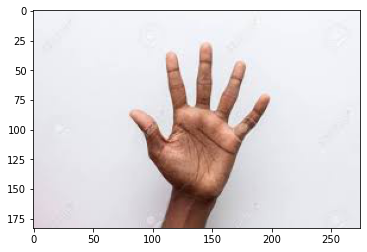

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [58]:
imgload = image.load_img(img_path,color_mode='grayscale',target_size=(64,64))
res = image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [60]:
type(res)

numpy.ndarray

In [61]:
res = np.expand_dims(res,axis=0)

In [62]:
res.shape

(1, 64, 64, 1)

Predict the result

In [63]:
pred_res = np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 132ms/step


array([5])

In [64]:
index = ['0','1','2','3','4','5']
final_res = str(index[pred_res[0]])
final_res

'5'